Importamos librerias primarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

Importamos el dataset y hacemos los primeros analisis
Hacemos limpieza de columnas innecesarias

In [2]:
df=pd.read_csv('data/dataset.csv')

In [3]:
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


Hicimos tambn un analisis de nuestras variables numericas, encontramos que tenemos 2 float 64 que son variables con decimales, Price y Seats, y int64 que son enteros Year y Kilometers_Driven

Analizamos el data type de nuestro dataset y encontramos que tenemos 9 columnas object las cuales tendremos que procesar.

Ahora haremos la busqueda de valores nulos en nuestro dataset y tomaremos una decision si los rellenamos
o directamente eliminamos la columna si son demasiados datos.
Tambien puede que sean booleanos y en ese caso si son nulos, se deben cambiar por 0.

In [6]:
null=df.isnull().mean()
null[null>0]

Mileage      0.000332
Engine       0.005981
Power        0.005981
Seats        0.006978
New_Price    0.863100
dtype: float64

Analizando los valores nulos, vemos que la columna New_Price tiene 86% de valores nulos, por eso optare por eliminarla,
ademas es una variable que no sera influyente para determinar nuestra variable dependiente.
Las otras columnas las rellenaremos posiblemente de la moda o media dependiendo.

In [7]:
if df.isnull().values.any():
    df=df.drop((df.columns[df.isnull().mean()>0.25]),axis=1)

Creamos un condicional para que cuando las columnas sean mayores a 25% de valores nulos, se elime directamente.
Ahora procederemos a rellenar las otras columnas para no tener valores nulos.
Tenemos 3 columnas dtype object las cuales rellenaremos con la moda de valores.
La columna restante al ser numerica la rellenaremos de la media.

In [8]:
df['Mileage']=df['Mileage'].fillna(df['Mileage'].mode()[0])
df['Engine']=df['Engine'].fillna(df['Engine'].mode()[0])
df['Power']=df['Power'].fillna(df['Power'].mode()[0])

In [9]:
df['Seats'].fillna(df['Seats'].mean(),inplace=True)

In [10]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Ya nuestro dataset esta libre de valores nulos.
En este caso en particular realizare un procesado extra, especialmente en la columna de Seats ya que, esta representa
valores absolutos, pero tenemos algunos valores decimales, los cuales lo convertiremos en absolutos.

In [11]:
df['Seats']=df['Seats'].abs().round()

Ahora trabajaremos sobre nuestras columnas object, principalmente Mileage,Engine y Power ya que son text y numericos combinados y dejaremos unicamente los valores numericos.

In [12]:
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [13]:
df['Mileage']=df['Mileage'].str.extract('(\d+\.?\d*)', expand=False)
df['Mileage']=pd.to_numeric(df['Mileage'])
df['Engine']=df['Engine'].str.extract('(\d+\.?\d*)', expand=False)
df['Engine']=pd.to_numeric(df['Engine'])
df['Power']=df['Power'].str.extract('(\d+\.?\d*)', expand=False)
df['Power']=pd.to_numeric(df['Power'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   int64  
 9   Power              5912 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 564.4+ KB


In [15]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                107
Seats                  0
Price                  0
dtype: int64

Ya tenemos nuestras columnas convertidas, ahora por seguridad siempre checar si se queda algun valor nulo, ya ques comun despues de la conversion.
En este caso la columna Power, y la rellenaremos con las medias.

In [16]:
df['Power'].fillna(df['Power'].mean(),inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   int64  
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 564.4+ KB


La columna de Year posiblemente no sea importante al momento de predecir Price, pero podemos convertir cuanto tiempo ha pasado desde que el modelo salio a dia de hoy, y este tiempo si que afecta al Precio.
Despues de crear la nueva columna, eliminaremos la vieja.

In [18]:
df['Year_date'] = pd.to_datetime(df['Year'], format='%Y')
df['Year_Since'] = round((datetime.datetime.now() - df['Year_date']) / np.timedelta64(1, 'Y'))
df['Year_Since']

0       13.0
1        8.0
2       12.0
3       11.0
4       10.0
        ... 
6014     9.0
6015     8.0
6016    11.0
6017    10.0
6018    12.0
Name: Year_Since, Length: 6019, dtype: float64

In [19]:
df=df.drop(['Year','Year_date'],axis=1)

Extraeremos los models de los vehiculos y dejaremos unicamente la Marca

In [20]:
df['Model'] = df['Name'].map(lambda x: str(x).strip().split(" ")[1])
df['Brand'] = df['Name'].map(lambda x: str(x).strip().split(" ")[0])

df.drop(columns='Name',inplace=True)

In [21]:
ruta='data/data_procesada.csv'
df.to_csv(ruta,index=False)

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

Ahora vamor a preprocesar nuestra variables categoricas

In [23]:
"""cat_cols = ['Location','Fuel_Type', 'Transmission', 'Owner_Type']

for col in cat_cols:
    ct=OneHotEncoder()
    encoded_features = ct.fit_transform(df[[col]]).toarray()
    num_categories = encoded_features.shape[1]
    column_names = [col + '_' + str(i) for i in range(num_categories)]
    encoded_df = pd.DataFrame(encoded_features, columns=column_names)
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(col, axis=1, inplace=True)"""

"cat_cols = ['Location','Fuel_Type', 'Transmission', 'Owner_Type']\n\nfor col in cat_cols:\n    ct=OneHotEncoder()\n    encoded_features = ct.fit_transform(df[[col]]).toarray()\n    num_categories = encoded_features.shape[1]\n    column_names = [col + '_' + str(i) for i in range(num_categories)]\n    encoded_df = pd.DataFrame(encoded_features, columns=column_names)\n    df = pd.concat([df, encoded_df], axis=1)\n    df.drop(col, axis=1, inplace=True)"

In [24]:
dummies=['Location','Fuel_Type', 'Transmission', 'Owner_Type']
df=pd.concat([df,pd.get_dummies(df[dummies],prefix_sep=";",drop_first=True)],axis=1)
df=df.drop(['Location','Fuel_Type', 'Transmission', 'Owner_Type'],axis=1)

In [25]:
cat_cols=['Model','Brand']
for col in cat_cols:
    label=LabelEncoder()
    label.fit(list(df[col].values))
    df[col]=label.transform(list(df[col].values))


In [26]:
df.isnull().sum()

Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Year_Since                   0
Model                        0
Brand                        0
Location;Bangalore           0
Location;Chennai             0
Location;Coimbatore          0
Location;Delhi               0
Location;Hyderabad           0
Location;Jaipur              0
Location;Kochi               0
Location;Kolkata             0
Location;Mumbai              0
Location;Pune                0
Fuel_Type;Diesel             0
Fuel_Type;Electric           0
Fuel_Type;LPG                0
Fuel_Type;Petrol             0
Transmission;Manual          0
Owner_Type;Fourth & Above    0
Owner_Type;Second            0
Owner_Type;Third             0
dtype: int64

Ya que tenemos todas nuestras columnas preprocesadas, realizaremos pruebas estadisticas.

In [27]:
#sns.pairplot(df, markers='+',kind='reg',diag_kind='auto',plot_kws={'line_kws':{'color':'#aec6cf'},
#                           'scatter_kws': {'alpha': 0.5,'color': '#82ad32'}},diag_kws= {'color': '#82ad32'})

array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Seats'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Year_Since'}>,
        <Axes: title={'center': 'Model'}>,
        <Axes: title={'center': 'Brand'}>,
        <Axes: title={'center': 'Location;Bangalore'}>],
       [<Axes: title={'center': 'Location;Chennai'}>,
        <Axes: title={'center': 'Location;Coimbatore'}>,
        <Axes: title={'center': 'Location;Delhi'}>,
        <Axes: title={'center': 'Location;Hyderabad'}>,
        <Axes: title={'center': 'Location;Jaipur'}>],
       [<Axes: title={'center': 'Location;Kochi'}>,
        <Axes: title={'center': 'Location;Kolkata'}>,
        <Axes: title={'center': 'Location;Mumbai'}>,
        <Axes: title={'center': 'Location;Pune'}>,
        <Axes: title={'center': 'Fuel_Type;Diesel'}>

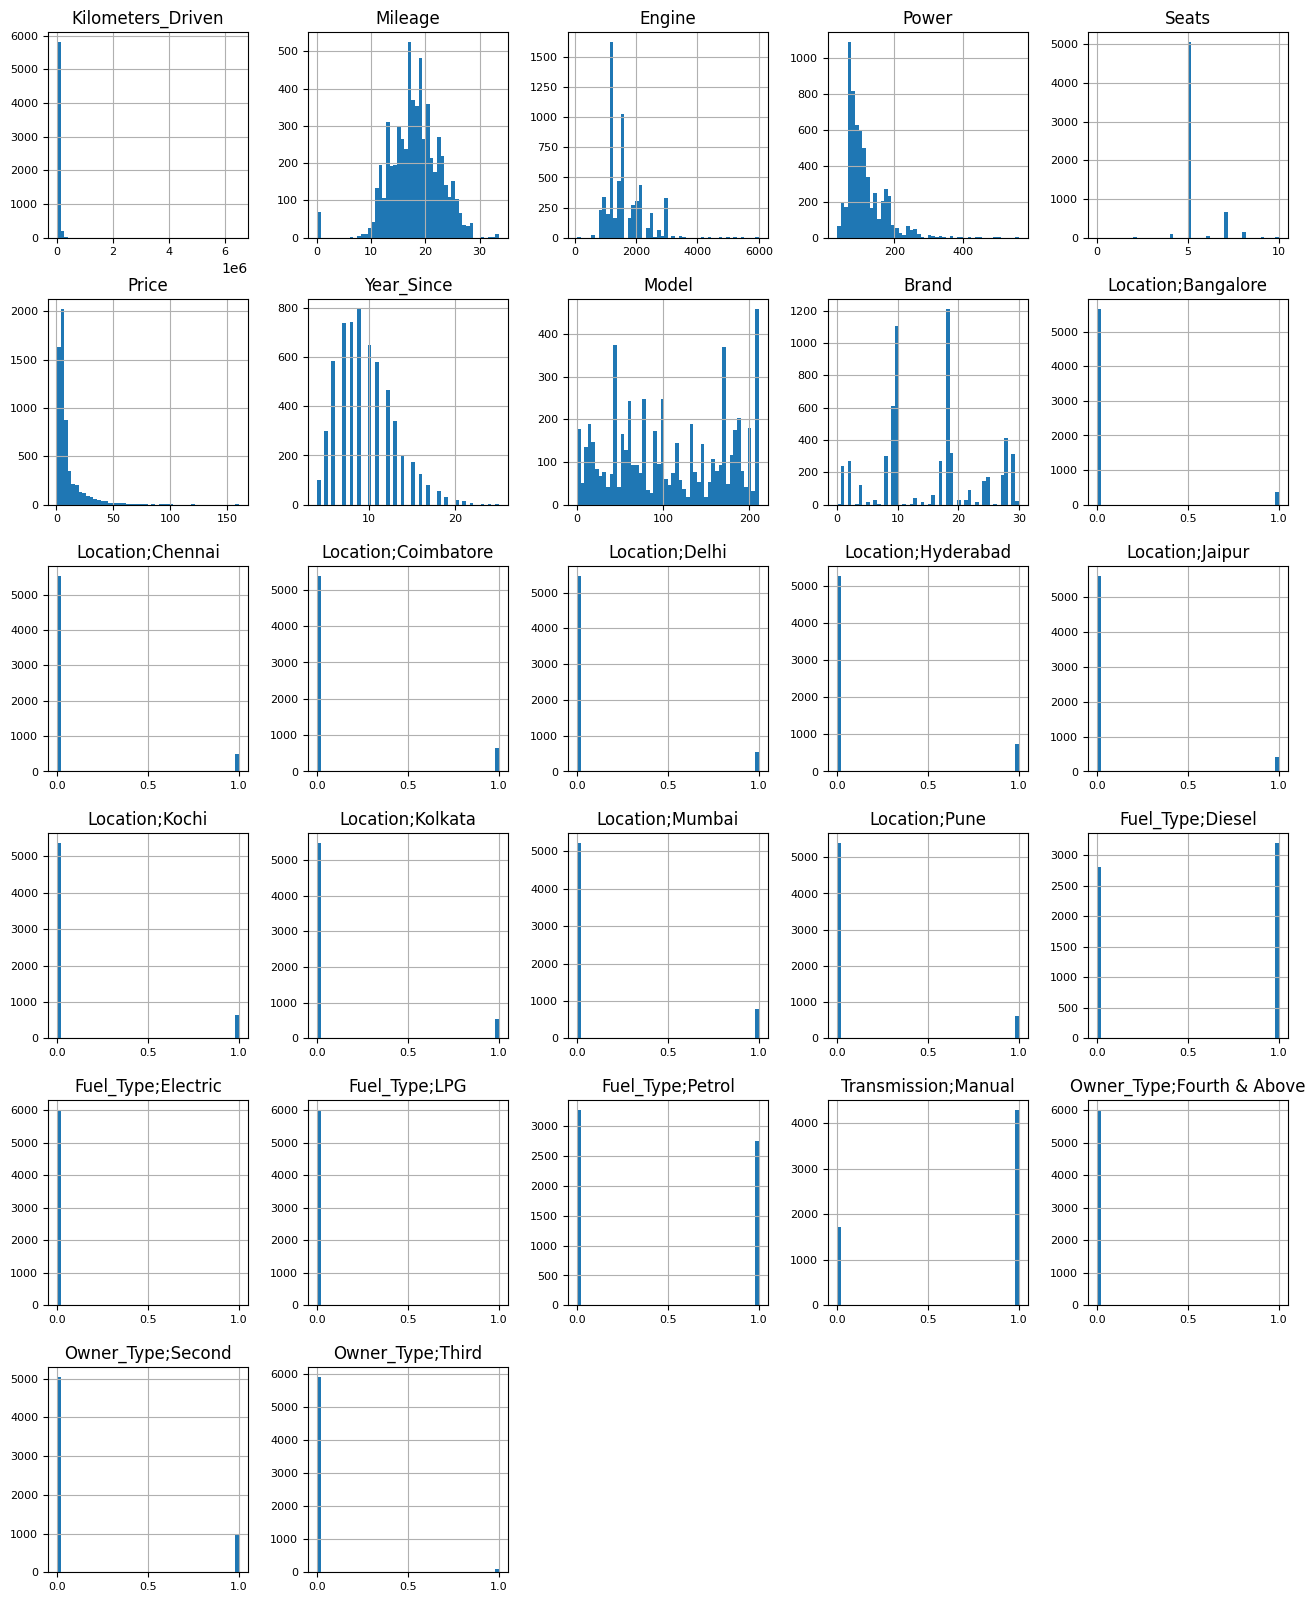

In [28]:
df.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

Analizamos las correlaciones

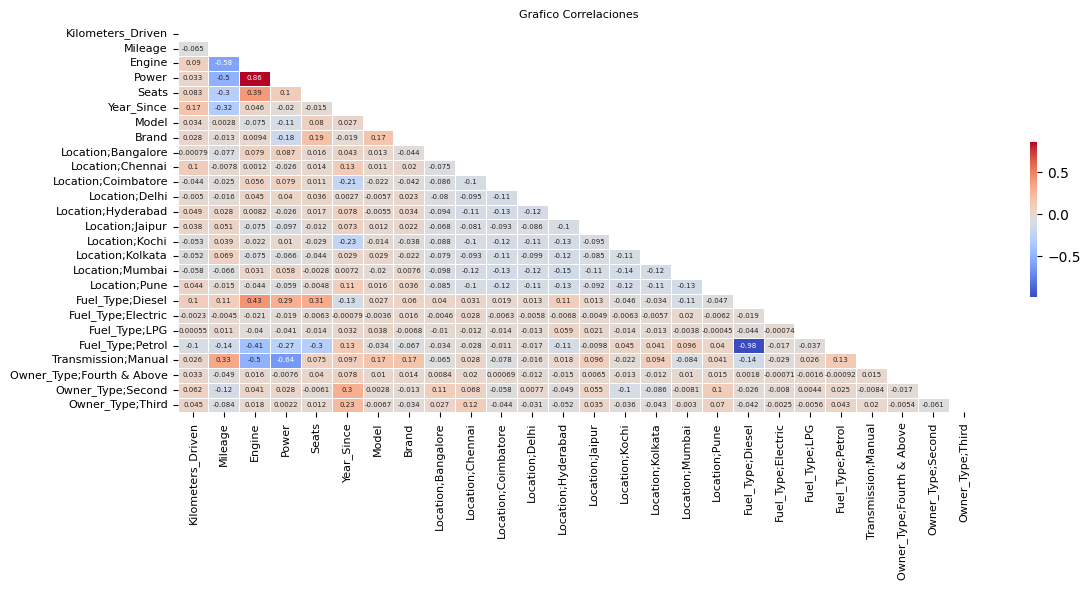

In [29]:
cov_matrix=df.drop(['Price'],axis=1).corr()
mask=np.triu(np.ones_like(cov_matrix,dtype=bool))
cov_matrix=cov_matrix.mask(mask)
plt.figure(figsize=(12,6))
sns.heatmap(cov_matrix,annot=True,cmap='coolwarm',linewidths=0.5,
            annot_kws={'size':5},cbar_kws={'shrink':0.4})
plt.title('Grafico Correlaciones',fontsize=8)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(rotation=0,fontsize=8)
plt.tight_layout()
plt.show()

In [30]:
ruta='data/data_procesada.csv'
df.to_csv(ruta,index=False)